In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
folder_input_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/data-hrv-swell-kw/'
img_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/plots/'
file_name = 'D - Physiology features (HR_HRV_SCL - final).csv'

In [10]:
import pandas as pd

df_all = pd.read_csv(folder_input_path + file_name)
df_all.head()

,PP,C,Condition,timestamp,HR,RMSSD,SCL
0,PP1,1,R,20120918T131600000,999,999.000000,80.239727
1,PP1,1,R,20120918T131700000,61,0.061420,77.365127
2,PP1,1,R,20120918T131800000,64,0.049663,77.359559
3,PP1,1,R,20120918T131900000,60,0.052487,76.728772
4,PP1,1,R,20120918T132000000,61,0.051189,76.512877


In [11]:
# Mapping for Condition to Stress_Name
stress_name_map = {
    'I': 'stress',
    'T': 'stress',
    'R': 'no stress',
    'N': 'no stress'
}

# Assign Stress_Indicator based on Condition
df_all['Stress_Name'] = df_all['Condition'].map(stress_name_map)

df = df_all[df_all['HR'] != 999].copy()
df

,PP,C,Condition,timestamp,HR,RMSSD,SCL,Stress_Name
1,PP1,1,R,20120918T131700000,61,0.061420,77.365127,no stress
2,PP1,1,R,20120918T131800000,64,0.049663,77.359559,no stress
3,PP1,1,R,20120918T131900000,60,0.052487,76.728772,no stress
4,PP1,1,R,20120918T132000000,61,0.051189,76.512877,no stress
5,PP1,1,R,20120918T132100000,65,0.037098,76.873877,no stress
...,...,...,...,...,...,...,...,...
3043,PP25,1,N,20121107T140100000,97,0.014706,123.631712,no stress
3044,PP25,1,N,20121107T140200000,95,0.013794,135.957293,no stress
3051,PP25,1,N,20121107T140900000,91,0.043623,144.205661,no stress
3060,PP25,2,R,20121107T143800000,83,0.032723,172.176987,no stress


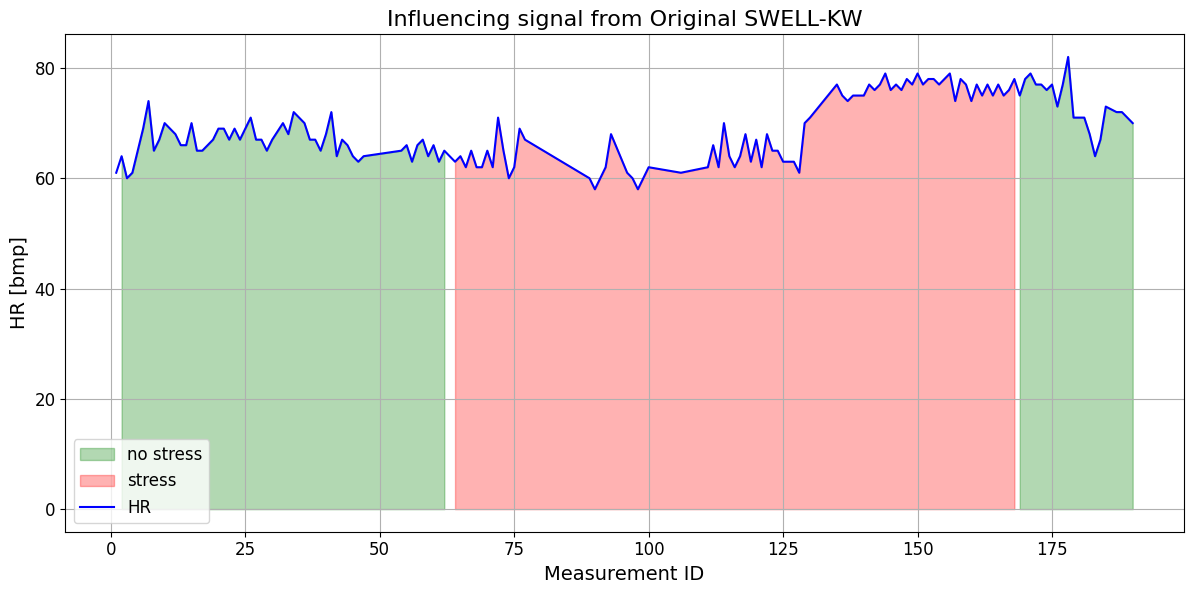

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.lines as lin

df = df[:150]

# Define a color for each condition
color_map = {
    'no stress': 'green',  # Green for no stress periods
    'stress': 'red'        # Red for stress periods
}

plt.figure(figsize=(12, 6))

prev_condition = df.iloc[0]['Stress_Name']
start_index = df.index[0]

# Plot the line for HR
plt.plot(df.index, df['HR'], color='blue', label='HR')

# Iterate through the dataframe and apply fill_between for blocks of conditions
for index, row in df.iterrows():
    condition = row['Stress_Name']

    # Check if the condition has changed since the last measurement
    if condition != prev_condition:
        end_index = index
        plt.fill_between(x=df[start_index:end_index].index,
                         y1=df[start_index:end_index]['HR'],
                         color=color_map[prev_condition],
                         alpha=0.3)
        start_index = index  # Reset the start index for the new block

    prev_condition = condition

# Fill the last block if the loop ends before the condition changes again
plt.fill_between(x=df[start_index:].index,
                 y1=df[start_index:]['HR'],
                 color=color_map[prev_condition],
                 alpha=0.3)

plt.title('Influencing signal from Original SWELL-KW', fontsize=16)
plt.xlabel('Measurement ID', fontsize=14)
plt.ylabel('HR [bmp]', fontsize=14)
plt.legend(handles=[pat.Patch(color=color_map['no stress'], label='no stress', alpha=0.3),
                    pat.Patch(color=color_map['stress'], label='stress', alpha=0.3),
                    lin.Line2D([], [], color='blue', label='HR')], fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(img_path + 'swell_influencing_signal.png', dpi=300, bbox_inches='tight')
plt.show()
